## Lab 2 

zID: z5271698

Name: Zhaoyan Liu

Below we provide sample code for the SIFT detector using SIFT_create() function from opencv_contrib package

In [4]:
import math
import numpy as np
import sys
import cv2
import matplotlib.pyplot as plt

In [6]:
#cv2.__version__

In [7]:
class SiftDetector():
    def __init__(self, norm="L2", params=None):
        self.detector=self.get_detector(params)
        self.norm=norm

    def get_detector(self, params):
        if params is None:
            params={}
            params["n_features"]=0
            params["n_octave_layers"]=3
            params["contrast_threshold"]=0.03
            params["edge_threshold"]=10
            params["sigma"]=1.6

        detector = cv2.SIFT_create(
                nfeatures=params["n_features"],
                nOctaveLayers=params["n_octave_layers"],
                contrastThreshold=params["contrast_threshold"],
                edgeThreshold=params["edge_threshold"],
                sigma=params["sigma"])

        return detector

In [8]:
# Function to rotate an input image
# parameters:
            # image: image to rotate
            # x: x-coordinate of point we wish to rotate around
            # y: y-coordinate of point we wish to rotate around
            # angle: degrees to rotate image by
# returns: rotated copy of the original image

def rotate(image, x, y, angle):
    rot_matrix = cv2.getRotationMatrix2D((x, y), angle, 1.0)
    h, w = image.shape[:2]

    return cv2.warpAffine(image, rot_matrix, (w, h))

In [9]:
# Function to get coordinates of center point in an image
# parameter:
            # image: image that will be rotated
# returns: (x,y) coordinates of point at the centre of an image

def get_img_center(image):
    height, width = image.shape[:2]
    center = height // 2, width // 2
    return center

## Task 1: Read the given sample image "Village.png" and compute the SIFT features of the given image.
- Extract SIFT features with default parameters and show the keypoints on the image.
- To achieve better visualization of the keypoints, reduce the number of keypoints. Hint: Vary the parameter contrastThreshold or nfeatures so that the number of keypoints becomes about 10% of all default keypoints.

1(a) Extract SIFT features with default parameters and show the keypoints on the image.

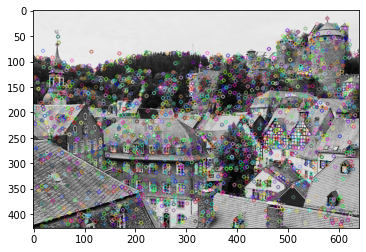

In [21]:
# image to gray
img = cv2.imread('Village.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Extract SIFT features and show the keypoints
sift = SiftDetector().get_detector(params=None)
kps_1a, des_1a = sift.detectAndCompute(img_gray, None)
img_sifta = cv2.drawKeypoints(img_gray, kps_1a, np.array([]))
img_1a = cv2.cvtColor(img_sifta, cv2.COLOR_BGR2RGB)

plt.imshow(img_1a)
plt.show()

1(b) reduce the number of keypoints

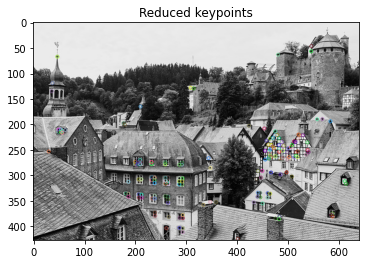

In [41]:
# Parameters for SIFT initializations such that we find only 10% of keypoints
params = {
    'n_features': 261,
    'n_octave_layers': 3,
    'contrast_threshold': 0.156, 
    'edge_threshold': 10,
    'sigma': 1.6
}

sift = SiftDetector(params=params)

kps_1b, des_1b = sift.detector.detectAndCompute(img_gray, None)
img_siftb = cv2.drawKeypoints(img_gray, kps_1b, np.array([]))
img_1b = cv2.cvtColor(img_siftb, cv2.COLOR_BGR2RGB)

plt.title("Reduced keypoints")
plt.imshow(img_1b)
plt.show()

In [42]:
print("Number of original features: " ,len(kps_1a))
print("Number of reduce features: " ,len(kps_1b))
print("Percentage of new feature:",len(kps_1b)/len(kps_1a))

Number of SIFI original features:  2605
Number of SIFI reduce features:  261
Percentage of new feature: 0.10019193857965451


I find there are 2605 keypoints, when I extract SIFT features from gray image.I set n_features to 200 to ensure that only 261 keypoints are keeped to reduced the number of keypoints 10% of original keypoints.
I also set contrast_threshold to 0.156 to remove some points with low contrast ratio. 

## Task 2: Change the scale of the image and recompute the SIFT features.
- Enlarge the given image by a scale percentage of 120.
- Extract the SIFT features and show the keypoints on the scaled image using the same parameter setting as for Task 1 (for the reduced number of keypoints).
- Inspect the keypoints visually: Are the keypoints of the scaled image roughly the same as those of the original image? What does this observation imply?
- Match the SIFT descriptors of the keypoints of the scaled image with those of the original image using the nearest-neighbour distance ratio method. Show the keypoints of the 5 best-matching descriptors on both the original and the scaled image. Hint: Brute-force matching is available in OpenCV for feature matching.


a) Enlarge the given image with a scaling factor of 120%.

In [50]:

width = int(img.shape[1] * 1.20)
height = int(img.shape[0] * 1.20)

# resize image
resized_img = cv2.resize(img, (width, height), interpolation = cv2.INTER_AREA)

print('Original Dimensions : ', img.shape)
print('Scaled Dimensions : ', resized_img.shape)

Original Dimensions :  (427, 640, 3)
Scaled Dimensions :  (512, 768, 3)


b) Extract the SIFT features and show the keypoints on the scaled image using the same parameter setting 

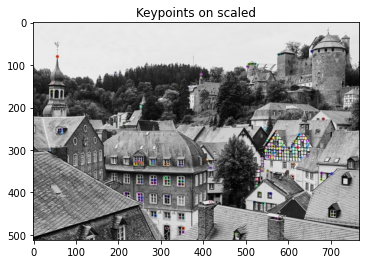

In [51]:
resized_gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
kps_2b, des_2b = sift.detector.detectAndCompute(resized_gray, None)
img_sift2b = cv2.drawKeypoints(resized_gray, kps_2b, np.array([]))
img_2b = cv2.cvtColor(img_sift2b, cv2.COLOR_BGR2RGB)

plt.title("Keypoints on scaled")
plt.imshow(img_2b)
plt.show()

d) Match the SIFT descriptors of the keypoints of the scaled image with those of the original image using the nearest-neighbour distance ratio method. 

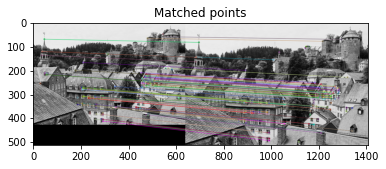

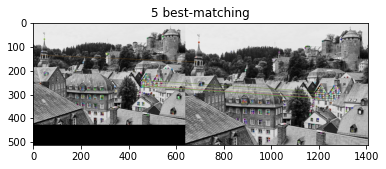

In [53]:
# Brute-force matching 
bf = cv2.BFMatcher()
matches = bf.knnMatch(des_1b, des_2b, k=2)

# Match points
points_matched = []
for m,n in matches:
    if m.distance < 0.7 * n.distance:
        points_matched.append([m])

# Draw
draw_match = cv2.drawMatchesKnn(img_1b, kps_1b, img_2b, kps_2b, points_matched, None, flags=2)
plt.title("Matched points")
plt.imshow(draw_match)
plt.show()

# Show the keypoints of the 5 best-matching descriptors on both the original and the scaled image.
best = points_matched[:6]
best_point = cv2.drawMatchesKnn(img_1b, kps_1b, img_2b, kps_2b, best, None, flags=2)
plt.title("5 best-matching")
plt.imshow(best_point)
plt.show()

c) Yes,the keypoints of the scaled image roughly are the same as those of the origianl image, which implies that that the scale of image will not affect the number of keypoints, so the SIFT features are scale invariant. 

## Task 3: Rotate the image and recompute the SIFT features.
- Rotate the given image anticlockwise by 65 degrees and separately also by 125 degrees.
- Extract the SIFT features and show the keypoints on the rotated image using the same parameter setting as for Task 1 (for the reduced number of keypoints).
- Inspect the keypoints visually: Are the keypoints of the rotated image roughly the same as those of the original image? What does this observation imply?
- Match the SIFT descriptors of the keypoints of the rotated image with those of the original image using the nearest-neighbour distance ratio method. Show the keypoints of the 5 best-matching descriptors on both the original and the rotated image.

a) Rotate the given image anticlockwise by 65 degrees and separately also by 125 degrees.

In [54]:
centre = get_img_center(img_gray)
rotation_65 = rotate(img_gray, centre[0], centre[1], -65)
rotation_125 = rotate(img_gray, centre[0], centre[1], -125)

b) For each rotated image, extract the SIFT features and show the keypoints on the image
using the same parameter setting as for Task 1 (for the reduced number of keypoints).

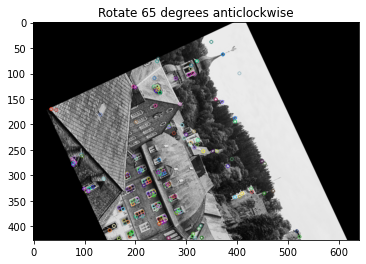

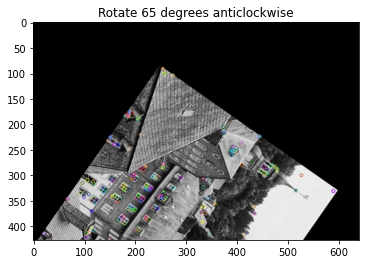

In [55]:
kps_3b_65, des_3b_65 = sift.detector.detectAndCompute(rotation_65, None)
img_rotate_65 =cv2.drawKeypoints(rotation_65,kps_3b_65,None)
plt.imshow(img_rotate_65, 'gray')
plt.title("Rotate 65 degrees anticlockwise")
plt.show()

kps_3b_125, des_3b_125 = sift.detector.detectAndCompute(rotation_125, None)
img_rotate_125 =cv2.drawKeypoints(rotation_125,kps_3b_125,None)
plt.imshow(img_rotate_125, 'gray')
plt.title("Rotate 65 degrees anticlockwise")
plt.show()

d) For each rotated image, match the SIFT descriptors of the keypoints with those of the
original image using the nearest-neighbour distance ratio method. Show the keypoints of
the 5 best-matching descriptors on both the original and the rotated image.

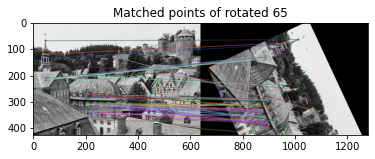

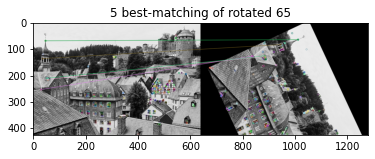

In [57]:
# 65
matches_65 = bf.knnMatch(des_1b, des_3b_65, k=2)

points_matched_65 = []
for m,n in matches_65:
    if m.distance < 0.7 * n.distance:
        points_matched_65.append([m])

# Draw
draw_match_65 = cv2.drawMatchesKnn(img_1b, kps_1b, img_rotate_65, kps_3b_65, points_matched_65, None, flags=2)
plt.title("Matched points of rotated 65")
plt.imshow(draw_match_65)
plt.show()

# Show the keypoints of the 5 best-matching descriptors on both the original and the scaled image.
best_65 = points_matched_65[:6]
best_point_65 = cv2.drawMatchesKnn(img_1b, kps_1b, img_rotate_65, kps_3b_65, best_65, None, flags=2)
plt.title("5 best-matching of rotated 65")
plt.imshow(best_point_65)
plt.show()

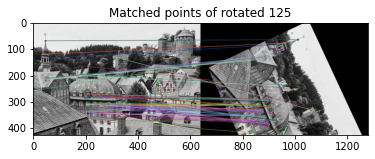

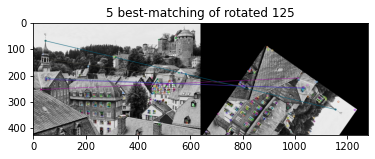

In [58]:
# 125
matches_125 = bf.knnMatch(des_1b, des_3b_125, k=2)

points_matched_125 = []
for m,n in matches_125:
    if m.distance < 0.7 * n.distance:
        points_matched_125.append([m])

# Draw
draw_match_125 = cv2.drawMatchesKnn(img_1b, kps_1b, img_rotate_125, kps_3b_125, points_matched_125, None, flags=2)
plt.title("Matched points of rotated 125")
plt.imshow(draw_match_65)
plt.show()

# Show the keypoints of the 5 best-matching descriptors on both the original and the scaled image.
best_125 = points_matched_125[:6]
best_point_125 = cv2.drawMatchesKnn(img_1b, kps_1b, img_rotate_125, kps_3b_125, best_125, None, flags=2)
plt.title("5 best-matching of rotated 125")
plt.imshow(best_point_125)
plt.show()

c) Yes, After resizing, The keypoints of the scaled image roughly are the same as those of the original image. This implies that the degree or rotation of image will not affect the number of keypoints, so the SIFT features are rotation invariant.